<a href="https://colab.research.google.com/github/FelixH-git/SVM-Pipeline/blob/main/LAb4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [2]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)




KNeighborsClassifier()

In [4]:
y_train_pred = knn_clf.predict(X_train)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)


array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.96975   , 0.97016667, 0.96933333, 0.96816667, 0.969     ])

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  42.8s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  40.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  40.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  40.1s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  40.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  42.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  40.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  40.6s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  40.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  39.7s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  39.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [10]:
grid_search.best_params_


{'n_neighbors': 4, 'weights': 'distance'}

In [12]:
final_knn = grid_search.best_estimator_
grid_search.best_score_


np.float64(0.9716166666666666)

In [15]:
knn_pred = final_knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [25]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

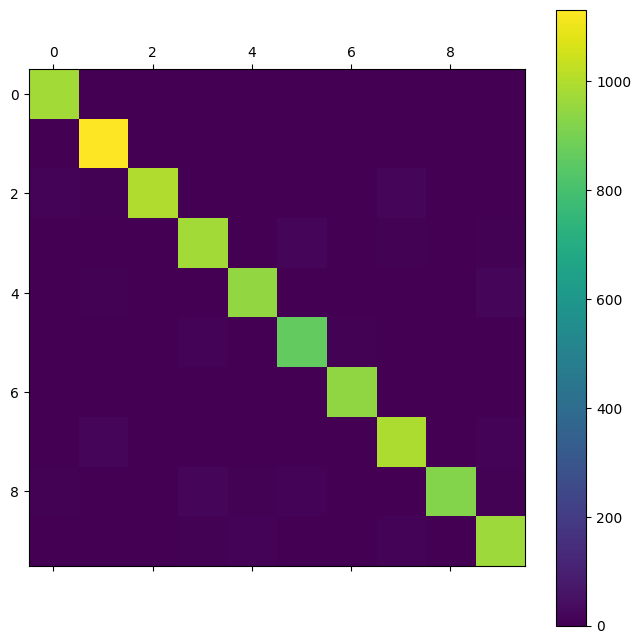

In [26]:
conf_mx_knn = confusion_matrix(y_test, knn_pred)

plot_confusion_matrix(conf_mx_knn)


In [41]:
def plot_misclassified(y_pred):
  misclassified_idx = (y_pred != y_test)
  X_misclassified = X_test[misclassified_idx]
  true = y_test[misclassified_idx]
  pred = y_pred[misclassified_idx]
  # Show first 25 misclassifications
  plt.figure(figsize=(10,10))
  for i in range(5):
      plt.subplot(5,5,i+1)
      plt.imshow(X_misclassified[i].reshape(28,28), cmap="gray")
      plt.title(f"T:{true[i]} P:{pred[i]}")
      plt.axis("off")
  plt.show()



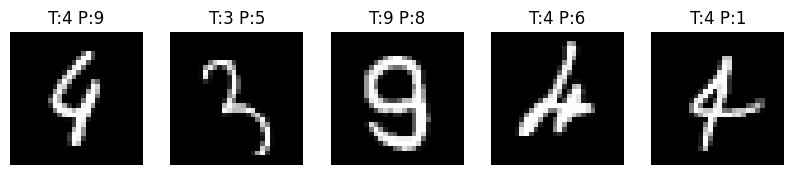

In [42]:
plot_misclassified(knn_pred)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)


sgd_clf.fit(X_train, y_train)



SGDClassifier(random_state=42)

In [16]:
sgd_preds = sgd_clf.predict(X_test)

In [35]:
print(classification_report(y_test, sgd_preds))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.65      0.90      0.75       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.88     10000



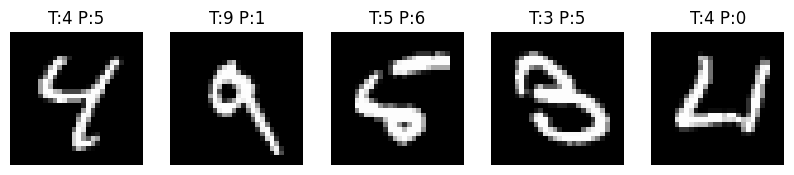

In [43]:
plot_misclassified (sgd_preds)

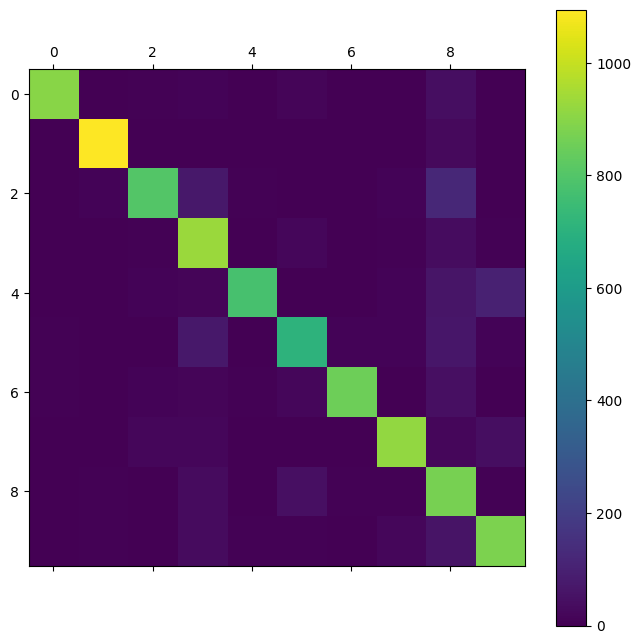

In [27]:
conf_mx_sgd = confusion_matrix(y_test, sgd_preds)

plot_confusion_matrix(conf_mx_sgd)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
forest_preds = forest_clf.predict(X_test)

In [36]:
print(classification_report(y_test, forest_preds))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



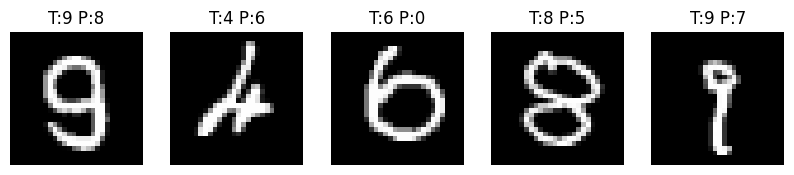

In [44]:
plot_misclassified( forest_preds)

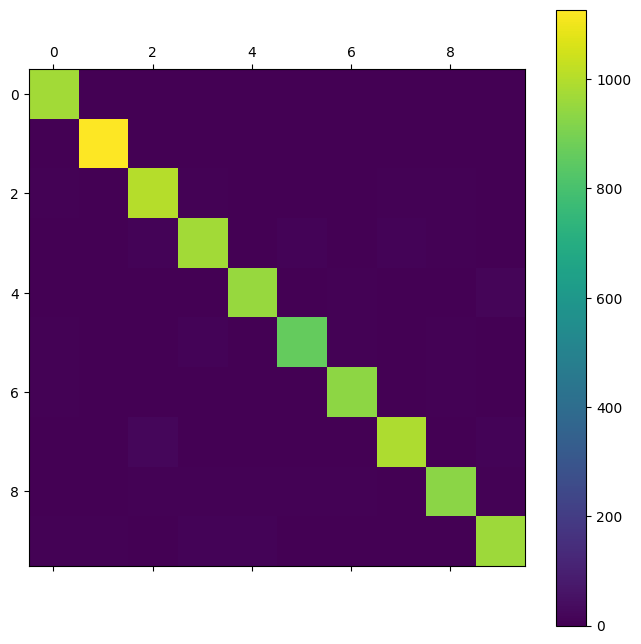

In [28]:
conf_mx_forest = confusion_matrix(y_test, forest_preds)

plot_confusion_matrix(conf_mx_forest)



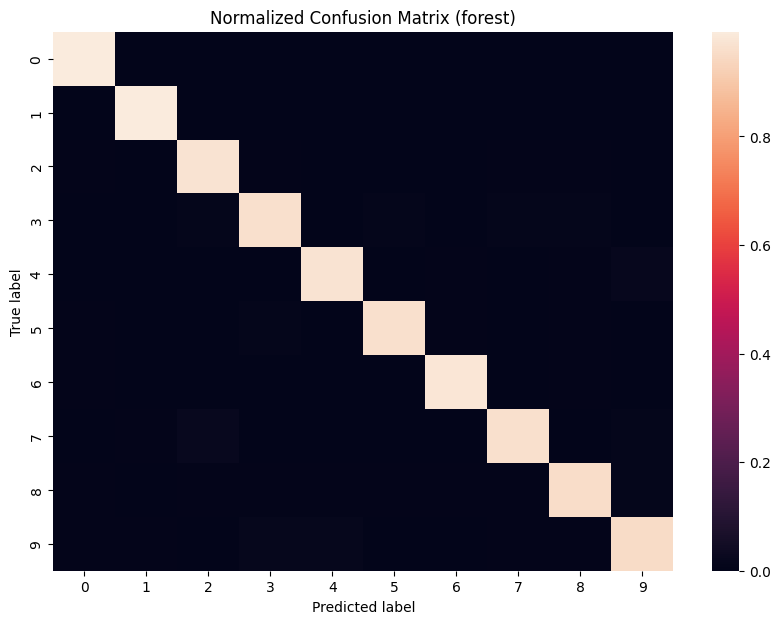

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,7))
sns.heatmap(conf_mx_forest.astype('float') / conf_mx_forest.sum(axis=1)[:, np.newaxis],
            annot=False)
plt.title("Normalized Confusion Matrix (forest)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [21]:
from sklearn.metrics import accuracy_score
print('accuracy for Random forest:', accuracy_score(y_test, forest_preds))
print('accuracy for KNN:',accuracy_score(y_test, knn_pred))
print('accuracy for SGD:',accuracy_score(y_test, sgd_preds))

accuracy for Random forest: 0.9705
accuracy for KNN: 0.9714
accuracy for SGD: 0.874
